In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval #module that converts a string of lists to a normal listdf = pd.read_csv('Hotel_reviews.csv')
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [4]:
data = pd.read_csv("Hotel_Reviews.csv")
df = pd.DataFrame(data)
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [5]:
# Replacing 'united kingdom' with 'UK' for easy use
df.Hotel_Address = df['Hotel_Address'].str.replace('United Kingdom','UK')
# Splitting the hotel address and picking out the last string which would be the countries
df['countries'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
df.countries.unique() # All the hotels are located in six(6) countries 

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

In [6]:
# Dropping unneeded columns
df.drop(['Additional_Number_of_Scoring',
       'Review_Date','Reviewer_Nationality', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng'],1,inplace=True)

C:\Users\mhugh\AppData\Local\Temp\ipykernel_6912\3088086669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Additional_Number_of_Scoring',


In [7]:
df['review'] = df['Negative_Review']+df['Positive_Review']

In [8]:
# df.drop(['Positive_Review','Negative_Review'],1,inplace=True)

In [8]:
df

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",Netherlands,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,no trolly or staff to help you take the lugga...,location,"[' Leisure trip ', ' Family with older childre...",Austria,no trolly or staff to help you take the lugga...
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,"[' Leisure trip ', ' Family with young childre...",Austria,The hotel looks like 3 but surely not 4 Brea...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,The ac was useless It was a hot week in vienn...,No Positive,"[' Leisure trip ', ' Family with older childre...",Austria,The ac was useless It was a hot week in vienn...
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,No Negative,The rooms are enormous and really comfortable...,"[' Leisure trip ', ' Group ', ' Standard Tripl...",Austria,No Negative The rooms are enormous and really ...


In [9]:
#module that converts a string of lists to a normal list
from ast import literal_eval
#function to convert array of tags to string
def impute(col):
  col = col[0]
  if (type(col) != list):
    return "".join(literal_eval(col))
  else:
    return col#using the function
df['Tags']  = df[['Tags']].apply(impute,axis=1)
df.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,Leisure trip Couple Duplex Double Room Sta...,Netherlands,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,Leisure trip Couple Duplex Double Room Sta...,Netherlands,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,Leisure trip Family with young children Dup...,Netherlands,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,Leisure trip Solo traveler Duplex Double Ro...,Netherlands,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,Leisure trip Couple Suite Stayed 2 nights ...,Netherlands,You When I booked with your company on line y...


In [10]:
# df['Tags_token'] = df['Tags'].apply(lambda x: " ".join([token.text for token in nlp(x) if token.is_alpha]))
text_for_wordcloud = " ".join(df['Positive_Review'][:5].values)

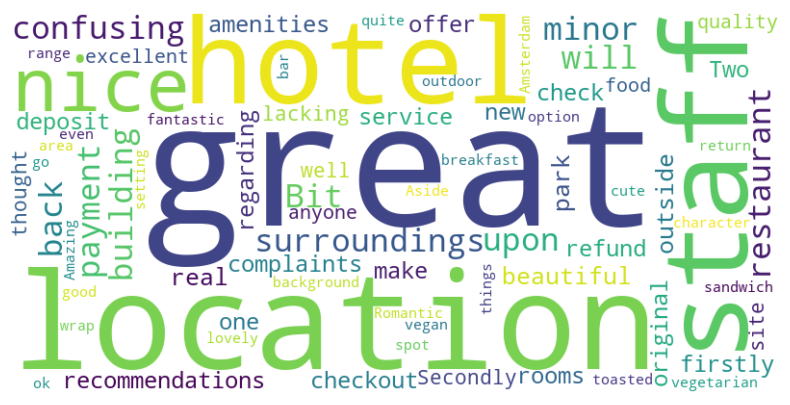

In [11]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# Sam's data

df_supplementary = pd.read_csv('./supplementary_hotel_scores.csv').drop(columns=['Unnamed: 0'])
df_nouns = pd.read_csv('./hotel_name_and_address_with_review_factors.csv')
df_nouns.drop_duplicates(subset='Hotel Name',keep='first',inplace=True)

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,drink bar problem building charm property staf...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location room bed staff cleanliness hotel brea...,room work wall area need refurbishment star ho...
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,style middle museum restaurant hotel room expe...,bit plate cup coffee bit hotel pillow quality ...
3,41,41 Buckingham Palace Road Westminster Borough ...,proximity service restaurant staff world star ...,thing room head staff hotel room night room ch...
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,staff room way staff food need dining restaura...,kind fruit juice bar guest guest experience ro...
...,...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,hotel ride minute walk station bar restaurant ...,stay hotel room road sleep traffic noise scree...
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,check bar lounge area shower towel convenience...,lift window shame room service breakfast price...
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,use light room breakfast room carpet bar floor...,room breakfast gym price room gym hotel coffee...
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,location hotel size room staff hotel location ...,hotel furniture day bathroom bath soap room st...


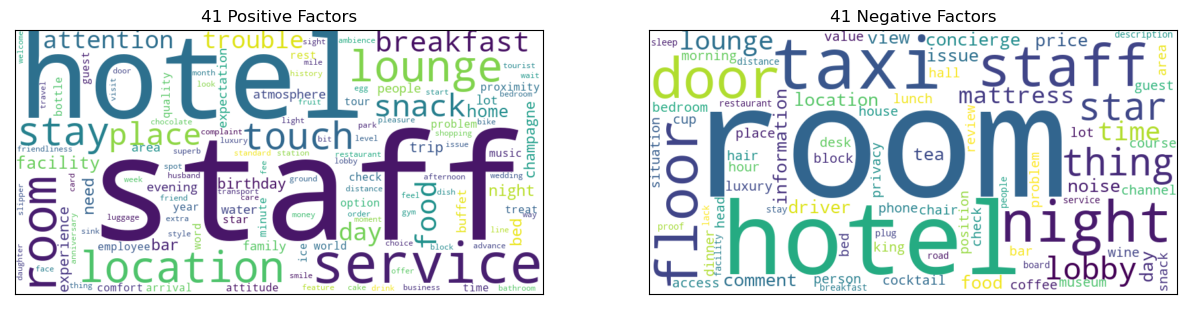

In [47]:
def get_wordclouds(hotel_name):
    positive_nouns = df_nouns.loc[df_nouns['Hotel Name'] == hotel_name, 'Positive Nouns'].iloc[0]
    negative_nouns = df_nouns.loc[df_nouns['Hotel Name'] == hotel_name, 'Negative Nouns'].iloc[0]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'{hotel_name} Positive Factors')
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_nouns)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title(f'{hotel_name} Negative Factors')
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_nouns)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

get_wordclouds('41')

In [57]:
def destination_and_description(location,description, display_amount=5):
    # Making these columns lowercase
    df['countries']=df['countries'].str.lower()
    df['Tags']=df['Tags'].str.lower()
    
    # Dividing the texts into small tokens (sentences into words)
    description = description.lower()
    description_tokens=word_tokenize(description)  
    
    sw = stopwords.words('english') # List of predefined english  stopwords to be used for computing
    lemm = WordNetLemmatizer() # We now define the functions below connecting these imported packages
    filtered_sen = {w for w in description_tokens if not w in sw}
    f_set=set()
    for fs in filtered_sen:
        f_set.add(lemm.lemmatize(fs))
    
    
    # Defining a new variable that takes in the location inputted and bring out the features defined below
    country_feat = df[df['countries']==location.lower()]
    country_feat = country_feat.set_index(np.arange(country_feat.shape[0]))
    l1 =[];l2 =[];cos=[];
    for i in range(country_feat.shape[0]):
        temp_tokens=word_tokenize(country_feat['Tags'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
       

        cos.append(len(rvector))
    country_feat['similarity']=cos
    country_feat=country_feat.sort_values(by='similarity',ascending=False)
    country_feat.drop_duplicates(subset='Hotel_Name',keep='first',inplace=True)
    country_feat.sort_values('Average_Score',ascending=False,inplace=True)
    country_feat.reset_index(inplace=True)

    country_feat = pd.merge(
        country_feat[['Hotel_Name', 'Average_Score', 'countries']], df_supplementary, 
        how='left', 
        left_on=['Hotel_Name'], 
        right_on=['Hotel Name']
    )

    country_feat = country_feat[[
        'Hotel Name', 'Hotel Address', 'countries', 'Number of Reviews', 'Average Score', 
        'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value'
    ]]

    country_feat.columns = country_feat.columns.str.title()

    country_feat.rename(columns={'Countries': 'Country'}, inplace=True)
    country_feat['Country'] = country_feat['Country'].str.title()
    country_feat.loc[country_feat['Country'] == 'Uk', 'Country'] = 'UK'
    
    
    display(country_feat.head(display_amount))

    get_wordclouds(country_feat['Hotel Name'].iloc[0])

,Hotel Name,Hotel Address,Country,Number Of Reviews,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,41,41 Buckingham Palace Road Westminster Borough ...,UK,103,9.6,7.6,6.0,6.1,9.1,5.3
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,UK,121,9.6,5.8,8.6,6.5,7.7,6.7
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,UK,141,9.5,5.7,7.1,7.7,8.4,6.3
3,The Soho Hotel,4 Richmond Mews Westminster Borough London W1D...,UK,157,9.5,4.4,6.4,7.8,7.8,7.8
4,Ham Yard Hotel,One Ham Yard Westminster Borough London W1D 7D...,UK,141,9.5,7.1,6.1,7.5,8.4,3.5


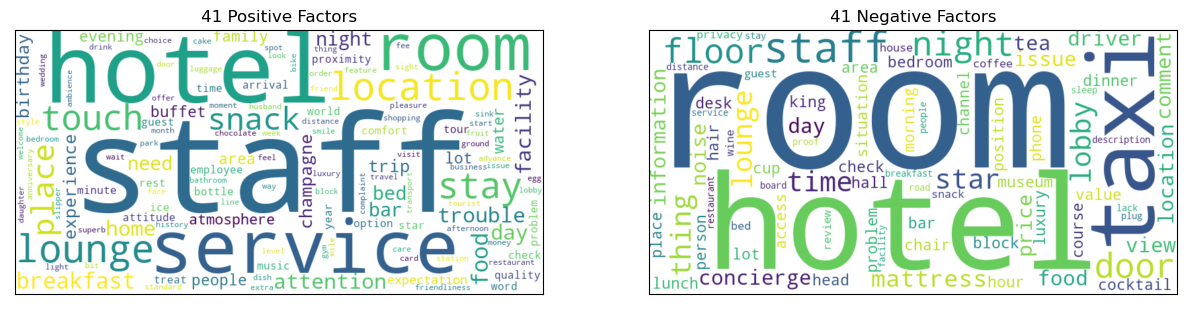

In [60]:
destination_and_description('Uk','I am going on a Business trip, I need a Deluxe room and i am staying for five nights ')